In [1]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5),(0.5, 0.5, 0.5) )])

In [3]:
trainset = torchvision.datasets.CIFAR10(root='../data', train=True,
                                        download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='../data', train=False,
                                      download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

In [5]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [6]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

In [7]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print("size of input tensor: {}".format(images.size()))
print("size of label tensor: {}".format(labels.size()))

size of input tensor: torch.Size([4, 3, 32, 32])
size of label tensor: torch.Size([4])


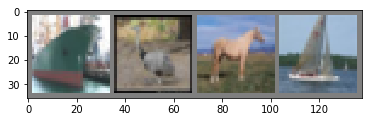

In [8]:
imshow(torchvision.utils.make_grid(images))

In [9]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6 , 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
net = Net()

In [10]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [11]:
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # inputs shape (4, 3, 32, 32) labels shape(4,)
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss:%.3f' % 
                 (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
print('Finished Training')

[1,  2000] loss:2.266
[1,  4000] loss:1.930
[1,  6000] loss:1.716
[1,  8000] loss:1.634
[1, 10000] loss:1.553
[1, 12000] loss:1.504
[2,  2000] loss:1.438
[2,  4000] loss:1.403
[2,  6000] loss:1.386
[2,  8000] loss:1.326
[2, 10000] loss:1.309
[2, 12000] loss:1.285
Finished Training
